In [1]:
import os
import numpy as np
import glob
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import cv2
import video_detection as vd
import json

[0.1608672  0.49093252 0.18961332]
[0.77966193 0.20103366 0.76159192]
[0.17841977 0.11951985 0.77220575]


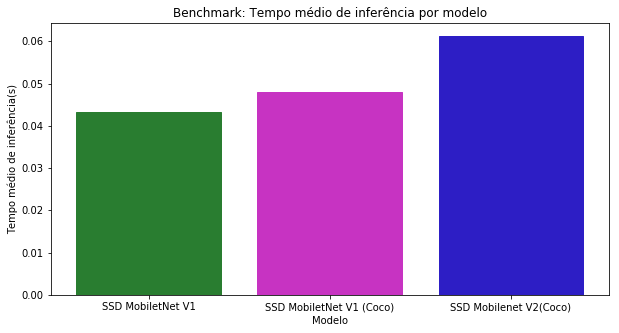

In [7]:
def conf_inter(sample, interval):
    avg = np.average(sample)
    std = st.sem(sample)
    conf = st.norm.interval(interval, loc=np.average(sample), scale=st.sem(sample)/math.sqrt(len(sample)))
    return conf

def collect_metrics(models):
    files = glob.glob('./benchmark/time*.dat')
    files.sort()
    metrics = np.zeros(shape=(len(models), 4))

    for i, file in enumerate(files):
        with open(file,'r') as f:
            data = f.read()
            measurements = np.array(data.split('\n'))
            measurements = measurements[measurements != ''].astype(np.float32)
            avg = np.average(measurements)
            std = st.sem(measurements)
            conf = conf_inter(measurements, 0.95)
            metrics[i,:] = [avg, std, conf[0], conf[1]]
    return metrics


def plot_time_bars(models, averages, errors, colors=None):
    fig, axis = plt.subplots(1, 1, figsize=(10, 5))
    axis.set_title('Benchmark: Tempo médio de inferência por modelo')
    axis.set_ylabel('Tempo médio de inferência(s)')
    axis.set_xlabel('Modelo')
    bars = axis.bar(models, averages, yerr=errors)
    if(colors == None):
        for bar in bars:
            color = np.random.rand(3)
            print(color)
            bar.set_color(color)
    else:
        for bar, color in zip(bars, colors):
            bar.set_color(color)

    if(os.path.exists('charts/bar.png')):
        os.remove('charts/bar.png')
    plt.savefig('charts/bar.png')

models = ['SSD MobiletNet V1', 'SSD MobiletNet V1 (Coco)', 'SSD Mobilenet V2(Coco)']
metrics = collect_metrics(models)
averages = metrics[:,0]
stds = metrics[:, 1]
errors = averages-metrics[:,2]

plot_time_bars(models, averages, errors)


In [21]:
models = []
models.append({'id': 1, 'name':'MobileNet-SSD v1 Tutorial'})
models.append({'id': 2, 'name':'MobiletNet-SSD v1 Coco'})
models.append({'id': 3, 'name':'MobiletNet-SSD v2 Coco'})

test_name = 'dataset'

test_result_files = ['benchmark/detections_{}_{}.json'.format(model['name'], test_name) for model in models]
print(test_result_files)

['benchmark/detections_MobileNet-SSD v1 Tutorial_dataset.json', 'benchmark/detections_MobiletNet-SSD v1 Coco_dataset.json', 'benchmark/detections_MobiletNet-SSD v2 Coco_dataset.json']


In [24]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

annotations = './dataset/val2017/annotations/instances_val2017.json'
coco_gt = COCO(annotations)

annotation_types = ['bbox']

for file in test_result_files:
    print('\n\nCurrent file under testing', file)
    dataset = coco_gt.loadRes(file)
    coco_eval = COCOeval(coco_gt, dataset, annotation_types[0])
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


Current file under testing benchmark/detections_MobileNet-SSD v1 Tutorial_dataset.json
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.46s).
Accumulating evaluation results...
DONE (t=1.51s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.012
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all 

<h2>Introdução</h2>
<p>A expansão dos dispositivos móveis, aliados à (), provocou () do interesse no estudo de visão computacional. </p>
<p>Portanto, este trabalho tem o propósito de realizar a comparação quantitativa de modelos de aprendizado de máquina voltados à detecção de objetos em imagens. Houve interesse, sobretudo, em estudar a aplicabilidade destes modelos em circunstâncias que  imponham limitações ao hardware utilizado, como em computadores pessoais de baixo custo. Além disso, buscou-se analisar métricas que apresentem maior relevância ao utilizador, determinando os aspectos que causariam maior impacto à experiência de usuário.</p>

<h2>Metodologia</h2>
<p>Para realização dos testes, foram selecionados modelos de visão computacional baseados em técnicas de Deep Learning, notórios por apresentar severas exigências de capacidade computacional. Tomando proveito dos recentes avanços da área, provenientes da demanda por aplicações de visão computacional em plataformas móveis, os modelos escolhidos foram (a,b,c).</p>
<p>A utilização destes modelos foi feita por meio da biblioteca OpenCV, </p>

<h2>Resultados</h2>

<h2>Conclusão</h2>